In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, norm
from scipy import stats

# Set some display options for better viewing
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
%matplotlib inline

In [7]:
df_train = pd.read_csv('E:/HOUSE PRICE PREDICTION/notebook/train.csv')
print(df_train.shape)

(1460, 81)


In [8]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


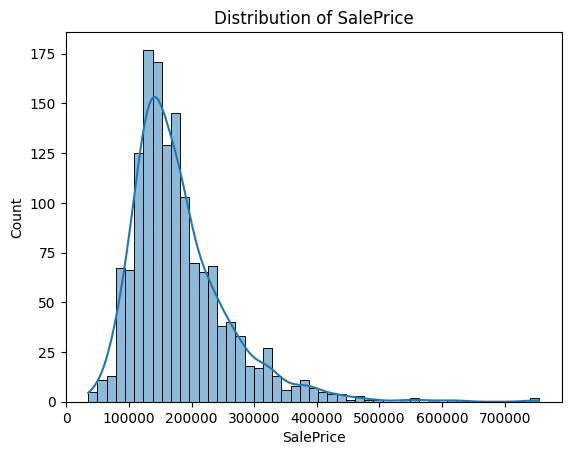

Skewness: 1.882876
Kurtosis: 6.536282


In [9]:
sns.histplot(df_train['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()

print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Finding: The SalePrice is right-skewed. This is common with price data.
Linear models work best on normally distributed data.
A log transformation is a great way to fix this.

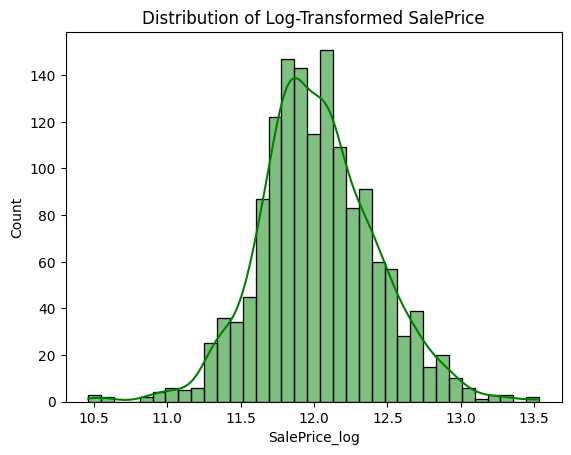

In [10]:
df_train['SalePrice_log'] = np.log1p(df_train['SalePrice'])

sns.histplot(df_train['SalePrice_log'], kde=True, color='green')
plt.title('Distribution of Log-Transformed SalePrice')
plt.show()

Finding: Much better! The distribution is now much closer to normal.

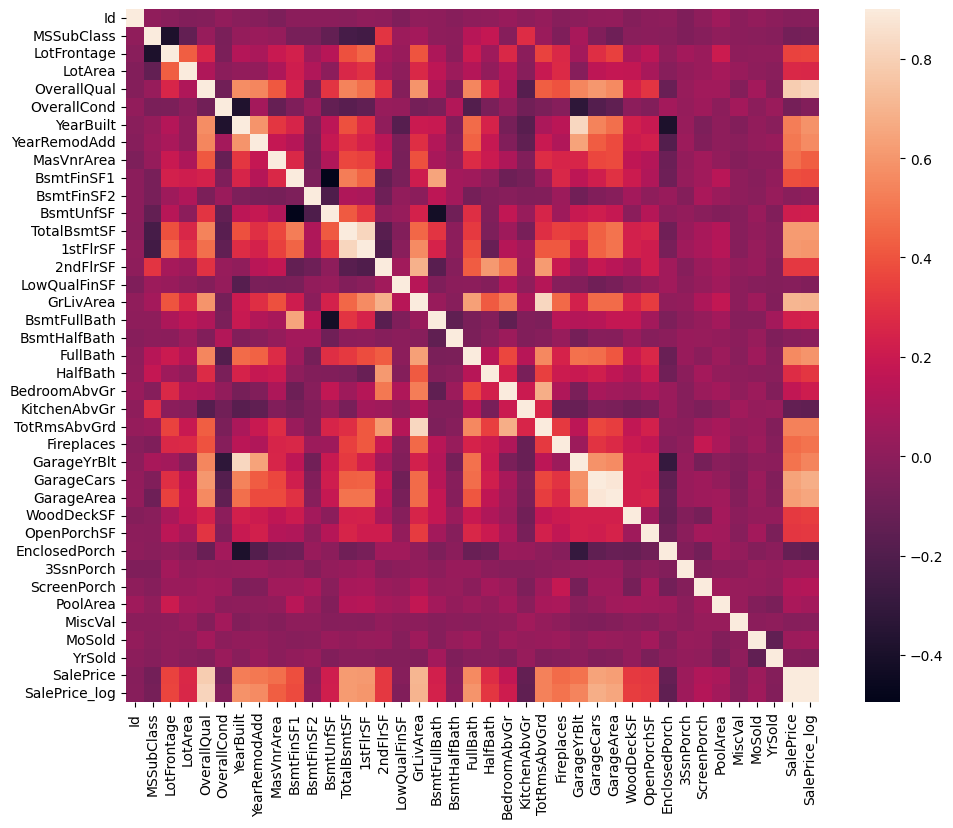

In [11]:
corrmat = df_train.corr(numeric_only=True)
plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.9, square=True)
plt.show()

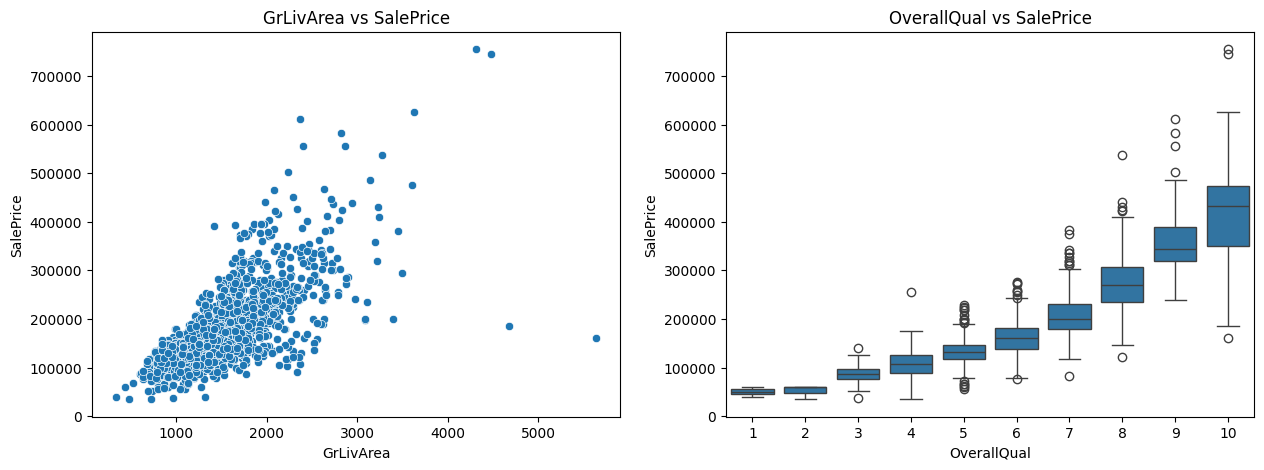

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(x=df_train['GrLivArea'], y=df_train['SalePrice'], ax=axes[0])
axes[0].set_title('GrLivArea vs SalePrice')
sns.boxplot(x=df_train['OverallQual'], y=df_train['SalePrice'], ax=axes[1])
axes[1].set_title('OverallQual vs SalePrice')
plt.show()

In [ ]:
#Finding the outliers

outliers_to_drop = df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index
print(f"Identified {len(outliers_to_drop)} outliers to remove.")

Identified 2 outliers to remove.


In [15]:
#Handling missing data

missing_data = df_train.isnull().sum().sort_values(ascending=False)
missing_percent = (df_train.isnull().sum() / len(df_train)).sort_values(ascending=False)
missing_table = pd.concat([missing_data, missing_percent], axis=1, keys=['Total', 'Percent'])
print(missing_table.head(20))


              Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
MasVnrType      872  0.597260
FireplaceQu     690  0.472603
GarageQual       81  0.055479
GarageFinish     81  0.055479
GarageYrBlt      81  0.055479
GarageCond       81  0.055479
GarageType       81  0.055479
BsmtFinType2     38  0.026027
BsmtExposure     38  0.026027
BsmtCond         37  0.025342
BsmtQual         37  0.025342
BsmtFinType1     37  0.025342
MasVnrArea        8  0.005479
Electrical        1  0.000685
OverallQual       0  0.000000
HouseStyle        0  0.000000


Fill the null values with 0 for numerical features & None for categorical features
We can impute median, mode or mean in those places also

In [16]:

df_train['LotFrontage'] = df_train.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)